yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
             yt        yt_       vt        yt1        yt2        yt3
0      393.0777   391.6012  6031199   390.4551   393.7283   390.1698
1      391.6012   390.7403  4330781   389.5892   391.8915   387.2619
2      390.7403   391.8214  3714176   391.2659   394.3440   390.0747
3      391.8214   394.3039  2393946   390.4551   393.0677   390.3750
4      394.3039   396.8414  3466971   390.2549   394.7644   389.2739
5      396.8414   403.8284  5453980   394.0937   397.0266   393.9285
6      403.8284   396.6262  5857528   398.3930   403.9035   398.0376
7      396.6262   398.1628  5522500   403.0527   404.8895   396.2929
8      398.1628   400.2549  7008464   399.3990   403.1277   396.0056
9      400.2549   395.7804  4103315   400.0296   401.0256   397.2969
10     395.7804   395.4601  4602925   401.5512   404.6092   395.6402
11     395.4601   400.2899  4399988   397.8975   398.3729   392.

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:157: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:159: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:162: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
800/800 [==============================] - 14s 17ms/step - loss: 0.2119
rmse_train  rmse_test 0.29604402832603005 129.36050230267327


C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:157: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:159: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:162: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
800/800 [==============================] - 12s 15ms/step - loss: 0.2054
rmse_train  rmse_test 0.2922044301508378 127.33020472217743
rmse_final_train   0.29412422923843395
rmse_final_test 128.34535351242533
comparing factor [1211.28875732]


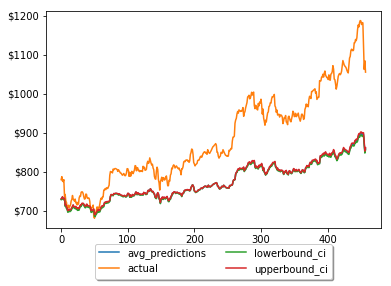

In [2]:
import numpy as np #bootstrapping 1000 times to compare by checking difference between upper and lower bounds of confidence intervals#
import pandas as pd
from sklearn import preprocessing
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras import backend as tf

df=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_csv=df
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-458
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
#y = data ['yt_']
#print (y) 
        
#       closed,  volume,   open,  high,   low  

cols =['yt']
#x = data [cols]
rmse_mean_trainset=0.0
rmse_mean_testset=0.0
n_bootstrap=1000
testset_array=np.zeros(shape=(n_bootstrap,458))
testset_array_sorted=np.zeros(shape=(n_bootstrap,458))

ci_lowerbound=np.zeros(shape=(1,458))
ci_upperbound=np.zeros(shape=(1,458))
n=800
b=1
B=0.01
lbb_listx=pd.DataFrame() 
#lbb_listy=pd.DataFrame()
for idx in range(n_bootstrap):
   
 m=0
 j=1
 while(m<n):
     while(j<b+1):
         rl=max(1,m*b-n*B)
        
         rh=min(n-b+1,m*b+n*B)
    
         k=random.randint(rl,rh+1)
        
         lbb_listx=lbb_listx.append(data.iloc[k+j-1-1,:],ignore_index=True)
        
        #lbb_listy=lbb_listy.append(y.iloc[k+j-1-1,:],ignore_index=True)
         j=j+1
     j=1
     m=m+1
 
#print(lbb_listx) 
 x_train=lbb_listx[cols]   
 x_test=data[cols].loc[800:1257,:]
 y_train=lbb_listx['yt_']
 y_test=data['yt_'].loc[800:1257]
 lbb_listx=lbb_listx.iloc[0:0,0:0]
 scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
 x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
 x_train_copy=x_train
#print(x_train)
#print(x_train.shape)

 smoothing_window_size = 320
 for di in range(0,800,smoothing_window_size):
     scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
     x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])
 
#scaler_x_train.fit(x_train[di+smoothing_window_size:,:])
#x_train[di+smoothing_window_size:,:] = scaler_x_train.transform(x_train[di+smoothing_window_size:,:])
 x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
 x_test=scaler_x_train.transform(x_test)
#print(x_test)
 x_train = x_train.reshape (x_train. shape + (1,)) 
 x_test = x_test.reshape (x_test. shape + (1,))
#print(x_train.shape)
#print(x_test.shape)



 scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
 y_train = np.array (y_train).reshape ((len( y_train),1 ))
 y_train_copy=y_train
#print(y_train.shape)
 smoothing_window_size = 320
 for di in range(0,800,smoothing_window_size):
     scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
     y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])

#scaler_y_train.fit(y_train[di+smoothing_window_size:])
#y_train[di+smoothing_window_size:] = scaler_y_train.transform(y_train[di+smoothing_window_size:])
 y_test = np. array (y_test).reshape ((len( y_test) ,1))
#y_test=scaler_y_train.transform(y_test)


    

 
    

 
     
     
 
 
 
 
 
 
 
 
 fit1 = Sequential ()
 fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(len(cols), 1) ))
 fit1.add(Dropout(0.2))
 fit1.add (Dense (output_dim =1, activation = 'linear'))
 
 fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
 fit1.fit (x_train, y_train, batch_size =20, nb_epoch =20, shuffle = False)
 
##print (fit1.summary())
 x_train_copy = np.array(x_train_copy).reshape (x_train_copy. shape + (1,)) 
#x_train = scaler_x_train.inverse_transform (np. array (x_train). reshape ((len( x_train), len(cols)))) 
#y_train = scaler_y_train.inverse_transform (np. array (y_train). reshape ((len( y_train), 1)))    
 pred1 = fit1.predict (x_train_copy) 
 pred1=np.array(pred1).reshape((len(pred1),1))
 sum=0.0
 for i in range(len(y_train)):
     sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
 sum1=(sum/len(y_train))**0.5
 rmse_mean_trainset=rmse_mean_trainset+sum1
#x_test = np. array (x_test). reshape ((len( x_test), len(cols)))
#y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))

 pred1 = fit1.predict (x_test)
 pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))    
#pred1=np.array(pred1).reshape((len(pred1),1))
 sum=0.0
 for i in range(len(y_test)):
     sum=sum+(y_test[i,0]-pred1[i,0])**2

    
 sum=(sum/len(y_test))**0.5
 pred1=np.array(pred1).reshape(1,len(pred1))
 testset_array[idx,:]=pred1
 rmse_mean_testset=rmse_mean_testset+sum
 print("rmse_train  rmse_test",sum1,sum)
 tf.clear_session()
 
  
rmse_mean_trainset=rmse_mean_trainset/n_bootstrap
rmse_mean_testset=rmse_mean_testset/n_bootstrap
print("rmse_final_train  ",rmse_mean_trainset)
print("rmse_final_test",rmse_mean_testset) 
testset_array_sorted=np.sort(testset_array,axis=0,kind='quicksort')  
avg_pred=np.sum(testset_array_sorted,axis=0)     
avg_pred=avg_pred/n_bootstrap 
avg_pred=np.array(avg_pred).reshape(458,1)
ci_lowerbound[0,:]=testset_array_sorted[24,:] 
ci_upperbound[0,:]=testset_array_sorted[974,:]
ci_upperbound=np.array(ci_upperbound).reshape(458,1)
ci_lowerbound=np.array(ci_lowerbound).reshape(458,1)
comparing_factor=np.sum(ci_upperbound,axis=0)-np.sum(ci_lowerbound,axis=0)

print("comparing factor",comparing_factor)

 

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
  
 
plt.plot(avg_pred, label="avg_predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
plt.plot(ci_lowerbound,label="lowerbound_ci")
plt.plot(ci_upperbound,label="upperbound_ci")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 

 
plt.show()


yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
             yt        yt_       vt        yt1        yt2        yt3
0      393.0777   391.6012  6031199   390.4551   393.7283   390.1698
1      391.6012   390.7403  4330781   389.5892   391.8915   387.2619
2      390.7403   391.8214  3714176   391.2659   394.3440   390.0747
3      391.8214   394.3039  2393946   390.4551   393.0677   390.3750
4      394.3039   396.8414  3466971   390.2549   394.7644   389.2739
5      396.8414   403.8284  5453980   394.0937   397.0266   393.9285
6      403.8284   396.6262  5857528   398.3930   403.9035   398.0376
7      396.6262   398.1628  5522500   403.0527   404.8895   396.2929
8      398.1628   400.2549  7008464   399.3990   403.1277   396.0056
9      400.2549   395.7804  4103315   400.0296   401.0256   397.2969
10     395.7804   395.4601  4602925   401.5512   404.6092   395.6402
11     395.4601   400.2899  4399988   397.8975   398.3729   392.

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:171: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", batch_input_shape=(15, 5, 1), recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:175: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:180: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
795/795 [==============================] - 24s 30ms/step - loss: 0.0791
Epoch 2/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0479
Epoch 3/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0476
Epoch 4/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0478
Epoch 5/20
795/795 [==============================] - 21s 26ms/step - loss: 0.0463
Epoch 6/20
795/795 [==============================] - 21s 26ms/step - loss: 0.0460
Epoch 7/20
795/795 [==============================] - 20s 26ms/step - loss: 0.0470
Epoch 8/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0467
Epoch 9/20
795/795 [==============================] - 20s 26ms/step - loss: 0.0465
Epoch 10/20
795/795 [==============================] - 20s 26ms/step - loss: 0.0471
Epoch 11/20
795/795 [==============================] - 21s 26ms/step - loss: 0.0471
Epoch 12/20
795/795 [==============================] - 21s 26ms/step - loss: 0.0459
E

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:171: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", batch_input_shape=(15, 5, 1), recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:175: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:180: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
795/795 [==============================] - 23s 29ms/step - loss: 0.0851
Epoch 2/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0515
Epoch 3/20
795/795 [==============================] - 20s 26ms/step - loss: 0.0536
Epoch 4/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0587
Epoch 5/20
795/795 [==============================] - 20s 26ms/step - loss: 0.0562
Epoch 6/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0553
Epoch 7/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0531
Epoch 8/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0499
Epoch 9/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0469
Epoch 10/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0452
Epoch 11/20
795/795 [==============================] - 20s 25ms/step - loss: 0.0416
Epoch 12/20
795/795 [==============================] - 21s 26ms/step - loss: 0.0396
E

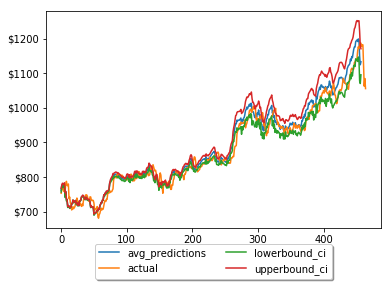

In [10]:
import numpy as np #bootstrapping 1000 times to compare by checking difference between upper and lower bounds of confidence intervals#
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras import backend as tf
from pandas import DataFrame
from pandas import concat
df=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_csv=df
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-458
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
#y = data ['yt_']
#print (y) 
        
#       closed,  volume,   open,  high,   low  

cols =['yt']
#x = data [cols]
rmse_mean_trainset=0.0
rmse_mean_testset=0.0
n_bootstrap=2
testset_array=np.zeros(shape=(n_bootstrap,458))
testset_array_sorted=np.zeros(shape=(n_bootstrap,458))

ci_lowerbound=np.zeros(shape=(1,458))
ci_upperbound=np.zeros(shape=(1,458))
n=800
b=2
f=10
lbb_listx=pd.DataFrame() 
#lbb_listy=pd.DataFrame()
for idx in range(n_bootstrap):
   
 m=0
 j=1
 u=n//b
 if(n!=b*u):
    u=u+1
     
 while(m<u):
      rl=max(1,m*b-f)
        
      rh=min(n-b+1,m*b+f)
    
      k=random.randint(rl,rh+1)   
      while(j<b+1):
         
        
         lbb_listx=lbb_listx.append(data.iloc[k+j-1-1,:],ignore_index=True)
        
        #lbb_listy=lbb_listy.append(y.iloc[k+j-1-1,:],ignore_index=True)
         j=j+1
      j=1
      m=m+1
 
#print(lbb_listx) 
 x_train=lbb_listx[cols]   
 x_test=data[cols].loc[800:1257,:]
 y_train=lbb_listx['yt_']
 y_test=data['yt_'].loc[800:1257]
 lbb_listx=lbb_listx.iloc[0:0,0:0]
 timesteps=5
 n_batch=15
 scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
 x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
 x_train_copy=x_train
 smoothing_window_size = 320
 for di in range(0,800,smoothing_window_size):
    scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
    x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])

    
 x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
 x_test_copy=x_test
 x_test=scaler_x_train.transform(x_test)

 x_train = x_train.reshape (len(x_train),1) 
 x_test = x_test.reshape (len(x_test),1)
    

    
    
    
    
    
    
 scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
 y_train = np.array (y_train).reshape ((len( y_train), 1))
 y_train_copy=y_train
 smoothing_window_size = 320
 for di in range(0,800,smoothing_window_size):
    scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
    y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])
    


 y_test = np. array (y_test).reshape ((len( y_test) ,1))
 y_test=scaler_y_train.transform(y_test)
 A=np.append(y_train,y_test,axis=0)
 A=np.array(A).reshape(len(y_train)+len(y_test),1)
 lag=timesteps
 df = DataFrame(A)

 columns = [df.shift(i) for i in range(lag,0,-1)]
 columns.append(df)
 df = concat(columns, axis=1)
 df=np.array(df).reshape(len(df),timesteps+1)
 const=len(x_train)
 const2=len(x_test)
 a=n_batch-(const2-((const2//n_batch)*n_batch))

 x_train=df[timesteps:len(x_train),0:-1]
 y_train=df[timesteps:const,-1]
 x_test=df[const-a:const+const2,0:-1]
 y_test=df[const-a:const+const2,-1]


 
     
     
 

 

 fit1 = Sequential ()
 fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , batch_input_shape =(n_batch,timesteps, 1) ))
 fit1.add(Dropout(0.2))


 fit1.add (Dense (output_dim =1, activation = 'linear'))
 
 fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
 x_train=np.array(x_train).reshape(len(x_train),timesteps,1)

 fit1.fit (x_train, y_train, batch_size =n_batch, nb_epoch =20, shuffle = False)
 
 print (fit1.summary())
 y_test=np.array(y_test).reshape(const2+a,1)
 A=np.append(y_train_copy,y_test,axis=0)
 A=np.array(A).reshape(len(y_train_copy)+len(y_test),1)
 lag=timesteps
 df = DataFrame(A)    
    
 columns = [df.shift(i) for i in range(lag,0,-1)]
 columns.append(df)
 df = concat(columns, axis=1)
 df=np.array(df).reshape(len(df),timesteps+1)
 x_train_copy=df[timesteps:const,0:-1]
 y_train_copy=df[timesteps:const,-1]

 x_train_copy=np.array(x_train_copy).reshape(len(x_train_copy),timesteps,1)

 pred1= fit1.predict(x_train_copy,batch_size=n_batch)
 pred1=np.array(pred1).reshape(len(pred1),1)
 y_train_copy=np.array(y_train_copy).reshape(len(pred1),1)


 sum=0.0
 for i in range(len(y_train_copy)):
    sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
 sum1=(sum/len(y_train))**0.5
 rmse_mean_trainset=rmse_mean_trainset+sum1
 
 x_test=np.array(x_test).reshape(len(x_test),timesteps,1)
 pred1=fit1.predict(x_test,batch_size=n_batch) 
 
 pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))

 y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( pred1), 1)))
 sum=0.0
 for i in range(a,len(y_test),1):
    sum=sum+(y_test[i,0]-pred1[i,0])**2

    
 sum=(sum/len(y_test)-a)**0.5
 
 for q in range(a,len(pred1),1):
    testset_array[idx,q-a]=pred1[q,0]
 rmse_mean_testset=rmse_mean_testset+sum
 print("rmse_train  rmse_test",sum1,sum)
 tf.clear_session()
 


      
    
 
 
 
  
rmse_mean_trainset=rmse_mean_trainset/n_bootstrap
rmse_mean_testset=rmse_mean_testset/n_bootstrap
print("rmse_final_train  ",rmse_mean_trainset)
print("rmse_final_test",rmse_mean_testset) 
testset_array_sorted=np.sort(testset_array,axis=0,kind='quicksort')  
avg_pred=np.sum(testset_array_sorted,axis=0)     
avg_pred=avg_pred/n_bootstrap 
avg_pred=np.array(avg_pred).reshape(458,1)
ci_lowerbound[0,:]=testset_array_sorted[0,:] 
ci_upperbound[0,:]=testset_array_sorted[1,:]
ci_upperbound=np.array(ci_upperbound).reshape(458,1)
ci_lowerbound=np.array(ci_lowerbound).reshape(458,1)
comparing_factor=np.sum(ci_upperbound,axis=0)-np.sum(ci_lowerbound,axis=0)

print("comparing factor",comparing_factor)

 

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
  
 
plt.plot(avg_pred, label="avg_predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
plt.plot(ci_lowerbound,label="lowerbound_ci")
plt.plot(ci_upperbound,label="upperbound_ci")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 

 
plt.show()
